Alguns dizem que a mudança climática é a maior ameaça da nossa era, enquanto outros dizem que é um mito baseado em ciência duvidosa. Estamos entregando alguns dos dados para que você possa formar sua própria visão.



Ainda mais do que com outros conjuntos de dados que o Kaggle apresentou, há uma enorme quantidade de limpeza e preparação de dados para montar um estudo de longo prazo das tendências climáticas. Os primeiros dados foram coletados por técnicos usando termômetros de mercúrio, onde qualquer variação no tempo de visita impactava nas medições. Na década de 1940, a construção de aeroportos fez com que muitas estações meteorológicas fossem deslocadas. Na década de 1980, houve uma mudança para termômetros eletrônicos que dizem ter um viés de resfriamento.

Dada essa complexidade, há uma série de organizações que coletam dados de tendências climáticas. Os três conjuntos de dados de temperatura terrestre e oceânica mais citados são o MLOST da NOAA, o GISTEMP da NASA e o HadCrut do Reino Unido.

Reempacotamos os dados de uma compilação mais recente feita pelo Berkeley Earth, que é afiliado ao Lawrence Berkeley National Laboratory. O Berkeley Earth Surface Temperature Study combina 1,6 bilhão de relatórios de temperatura de 16 arquivos pré-existentes. É bem empacotado e permite fatiar em subconjuntos interessantes (por exemplo, por país). Eles publicam os dados de origem e o código das transformações que aplicaram. Eles também usam métodos que permitem a inclusão de observações meteorológicas de séries temporais mais curtas, o que significa que menos observações precisam ser descartadas.

# **Dicionário de variáveis:**

Date: começa em 1750 para temperatura média da terra e 1850 para temperaturas máximas e mínimas da terra e temperaturas globais do oceano e da terra

LandAverageTemperature: temperatura média global da terra em celsius

LandAverageTemperatureUncertainty: o intervalo de confiança de 95% em torno da média

State: Estados

Coutry: Paises

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
clima = pd.read_csv('GlobalLandTemperaturesByState.csv')
clima

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [ ]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


Analisando esse dataset, reduzimos apenas para informações do Brasil, um pais tropical, que há uma variabilidade de temperatura grande, pois queriamos testar o cluster, e se o algoritmo conseguiria identificar as regiões por média de temperatura.

In [ ]:
clima_brasil = clima[clima['Country'] == 'Brazil']

In [ ]:
clima_brasil.to_csv('clima_brasil.csv')

In [ ]:
clima_brasil = pd.read_csv('/content/clima_brasil.csv')

In [ ]:
clima_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34328 entries, 0 to 34327
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     34328 non-null  int64  
 1   dt                             34328 non-null  object 
 2   AverageTemperature             32451 non-null  float64
 3   AverageTemperatureUncertainty  32451 non-null  float64
 4   State                          34328 non-null  object 
 5   Country                        34328 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
clima_brasil = clima_brasil.drop(['Unnamed: 0'], axis=1)
clima_brasil

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
34323,2013-05-01,26.605,0.768,Tocantins,Brazil
34324,2013-06-01,26.646,0.834,Tocantins,Brazil
34325,2013-07-01,26.432,1.003,Tocantins,Brazil
34326,2013-08-01,27.276,0.898,Tocantins,Brazil


In [ ]:
clima_brasil[clima_brasil['AverageTemperature'].isnull()]

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
14,1856-07-01,NaN,NaN,Acre,Brazil
20,1857-01-01,NaN,NaN,Acre,Brazil
21,1857-02-01,NaN,NaN,Acre,Brazil
22,1857-03-01,NaN,NaN,Acre,Brazil
23,1857-04-01,NaN,NaN,Acre,Brazil
...,...,...,...,...,...
32312,1845-10-01,NaN,NaN,Tocantins,Brazil
32313,1845-11-01,NaN,NaN,Tocantins,Brazil
32314,1845-12-01,NaN,NaN,Tocantins,Brazil
32369,1850-07-01,NaN,NaN,Tocantins,Brazil


In [ ]:
clima_brasil2 = clima_brasil[clima_brasil['AverageTemperature'].isnull()]
clima_brasil2['State'].value_counts()

Rio Grande Do Norte    417
Acre                   293
Roraima                199
Alagoas                 85
Bahia                   85
Distrito Federal        85
Mato Grosso             85
Mato Grosso Do Sul      85
Minas Gerais            85
Pernambuco              85
Rio De Janeiro          85
Rio Grande Do Sul       85
Santa Catarina          85
Sergipe                 85
Tocantins               17
Amazonas                16
Name: State, dtype: int64

In [ ]:
clima_brasil['State'].value_counts()

Roraima                2277
Alagoas                2181
Bahia                  2181
Distrito Federal       2181
Mato Grosso            2181
Mato Grosso Do Sul     2181
Minas Gerais           2181
Pernambuco             2181
Rio De Janeiro         2181
Rio Grande Do Sul      2181
Santa Catarina         2181
Sergipe                2181
Tocantins              2181
Amazonas               2025
Rio Grande Do Norte    1953
Acre                   1901
Name: State, dtype: int64

In [ ]:
clima_brasil['dt'] = pd.to_datetime(clima_brasil['dt'])

clima_brasil['day'] = clima_brasil['dt'].dt.day
clima_brasil['month'] = clima_brasil['dt'].dt.month
clima_brasil['year'] = clima_brasil['dt'].dt.year

In [ ]:
clima_brasil

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,day,month,year
0,1855-05-01,25.544,1.171,Acre,Brazil,1,5,1855
1,1855-06-01,24.228,1.103,Acre,Brazil,1,6,1855
2,1855-07-01,24.371,1.044,Acre,Brazil,1,7,1855
3,1855-08-01,25.427,1.073,Acre,Brazil,1,8,1855
4,1855-09-01,25.675,1.014,Acre,Brazil,1,9,1855
...,...,...,...,...,...,...,...,...
34323,2013-05-01,26.605,0.768,Tocantins,Brazil,1,5,2013
34324,2013-06-01,26.646,0.834,Tocantins,Brazil,1,6,2013
34325,2013-07-01,26.432,1.003,Tocantins,Brazil,1,7,2013
34326,2013-08-01,27.276,0.898,Tocantins,Brazil,1,8,2013


In [ ]:
clima_brasil['year'].min()

1824

In [ ]:
clima_brasil['year'].max()

2013

Verificamos que não tem todos os estados brasileiros, logo dividimos os estados que exitem por região Norte, Nordeste, Sul, Sudeste, Centro-oeste, e como para um valor significante em questões de comparação, utilizamos os ultimos 30 anos.

In [ ]:
clima_brasil2 = clima_brasil[clima_brasil['year'] >= 1983 ]
clima_brasil2

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,day,month,year
1532,1983-01-01,27.461,0.386,Acre,Brazil,1,1,1983
1533,1983-02-01,26.982,0.853,Acre,Brazil,1,2,1983
1534,1983-03-01,27.080,0.294,Acre,Brazil,1,3,1983
1535,1983-04-01,27.002,0.288,Acre,Brazil,1,4,1983
1536,1983-05-01,26.833,0.500,Acre,Brazil,1,5,1983
...,...,...,...,...,...,...,...,...
34323,2013-05-01,26.605,0.768,Tocantins,Brazil,1,5,2013
34324,2013-06-01,26.646,0.834,Tocantins,Brazil,1,6,2013
34325,2013-07-01,26.432,1.003,Tocantins,Brazil,1,7,2013
34326,2013-08-01,27.276,0.898,Tocantins,Brazil,1,8,2013


In [ ]:
clima_brasil2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5904 entries, 1532 to 34327
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             5904 non-null   datetime64[ns]
 1   AverageTemperature             5888 non-null   float64       
 2   AverageTemperatureUncertainty  5888 non-null   float64       
 3   State                          5904 non-null   object        
 4   Country                        5904 non-null   object        
 5   day                            5904 non-null   int64         
 6   month                          5904 non-null   int64         
 7   year                           5904 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 415.1+ KB


In [ ]:
# o grupo decidiu eliminar as linhas com Nan pois conclui que não impactariam no resultado 
brasil_30_anos = clima_brasil2.dropna()

In [ ]:
# o objetivo é realizar um agrupamento para testar a hipotese de que regiões diferentes possuem médias de temperatura diferentes

In [ ]:
brasil_30_anos.groupby(['State', 'month']).mean().drop(['year', 'day'], axis = 1)

AverageTemperature  AverageTemperatureUncertainty
State     month                                                   
Acre      1               26.417581                       0.334742
          2               26.330613                       0.361387
          3               26.470000                       0.343387
          4               26.306613                       0.404581
          5               25.980742                       0.403774
...                             ...                            ...
Tocantins 8               27.477516                       0.460161
          9               28.373333                       0.450533
          10              27.490067                       0.387000
          11              26.551867                       0.325567
          12              25.962800                       0.378067

[192 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


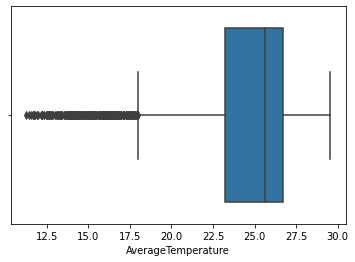

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(brasil_30_anos['AverageTemperature'])

o grupo decidiu não remover os outliers pois isso poderia atrapalhar no teste de hipótese do trabalho.

Para verificarmos uma variedade melhor de temperatura, separamos entre os meses de junho, julho, agosto (6/7/8) que configura inverno no hemisferio sul, sabemos que o brasil o norte fica no hemisferio norte, logo o inverno deles, não é o mesmo, mas queriamos ver a discrepância de temperaturas.

In [ ]:
brasil_inverno = brasil_30_anos[(brasil_30_anos['month'] >= 6) & (brasil_30_anos['month'] <= 8)]
brasil_inverno

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,day,month,year
1537,1983-06-01,24.182,0.669,Acre,Brazil,1,6,1983
1538,1983-07-01,25.509,0.262,Acre,Brazil,1,7,1983
1539,1983-08-01,26.173,0.543,Acre,Brazil,1,8,1983
1549,1984-06-01,25.242,0.316,Acre,Brazil,1,6,1984
1550,1984-07-01,25.860,0.627,Acre,Brazil,1,7,1984
...,...,...,...,...,...,...,...,...
34313,2012-07-01,26.515,0.672,Tocantins,Brazil,1,7,2012
34314,2012-08-01,27.120,0.771,Tocantins,Brazil,1,8,2012
34324,2013-06-01,26.646,0.834,Tocantins,Brazil,1,6,2013
34325,2013-07-01,26.432,1.003,Tocantins,Brazil,1,7,2013


In [ ]:
y.unique()

array([0, 4, 3, 2, 1])

In [ ]:
brasil_inverno['regiões'] = brasil_inverno['State'].map({'Acre' : 'Norte', 'Alagoas' : 'Nordeste' , 'Bahia' : 'Nordeste', 'Amazonas' : 'Norte', 'Distrito Federal' : 'Centro Oeste', 'Mato Grosso' : 'Centro Oeste', 'Mato Grosso Do Sul': 'Centro Oeste', 'Minas Gerais': 'Sudeste', 'Pernambuco' : 'Nordeste', 'Rio De Janeiro': 'Sudeste', 'Rio Grande Do Norte': 'Nordeste', 'Rio Grande Do Sul' : 'Sul', 'Roraima' : 'Norte', 'Santa Catarina' : 'Sul', 'Sergipe' : 'Nordeste' , 'Tocantins' : 'Norte'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Norte: 0
Sul: 1
Sudeste: 2
Centro-oeste: 3
Nordeste: 4

In [ ]:
brasil_inverno['regiões2'] = brasil_inverno['regiões'].map({ 'Norte': 0 , 'Sul': 1 , 'Sudeste': 2 , 'Centro Oeste': 3 , 'Nordeste': 4})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X = brasil_inverno.drop(['State','Country', 'dt', 'day', 'year','month','regiões', 'regiões2'], axis=1)
y = brasil_inverno.regiões2

In [ ]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.3 MB/s 


Aplicando o metodo do cotovelo, para verificar quantos cluster seria possivel.

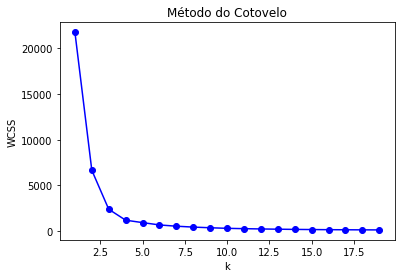

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

WCSS_kmeans = []
WCSS_kmedoi = []

K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    WCSS_kmeans.append(kmeans.inertia_)

    kmedoids = KMedoids(n_clusters=k).fit(X)
    WCSS_kmedoi.append(kmedoids.inertia_)

#plt.figure(figsize=(6,6))
#plt.subplot(1, 2, 1)
plt.plot(K, WCSS_kmeans, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")

# plt.subplot(1, 2, 2)
# plt.plot(K, WCSS_kmedoi, '-bo')
# plt.xlabel('k')
# plt.ylabel('WCSS')
# plt.title("Método do Cotovelo")

plt.show()



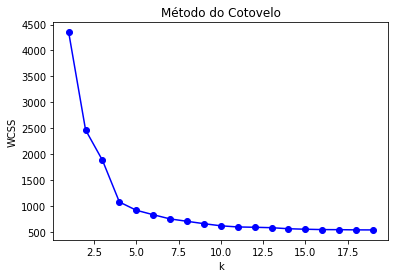

In [ ]:
#plt.subplot(1, 2, 2)
plt.plot(K, WCSS_kmedoi, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")

plt.show()

Testamos de 3 a 5 clusters.

In [ ]:
kmedia3 = KMeans(n_clusters=3, random_state=10)
kmedia3_pred = kmedia3.fit_predict(X)
kmedia4 = KMeans(n_clusters=4)
kmedia4_pred = kmedia4.fit_predict(X)
kmedia5 = KMeans(n_clusters=5)
kmedia5_pred = kmedia5.fit_predict(X)
#kmedia6 = KMeans(n_clusters=6)
#kmedia6_pred = kmedia6.fit_predict(X)

In [ ]:
kmedoi4 = KMedoids(n_clusters=4)
kmedoi4_pred = kmedoi4.fit_predict(X)

kmedoi5 = KMedoids(n_clusters=5)
kmedoi5_pred = kmedoi5.fit_predict(X)

print("\nK-medoids com k = 4")
print('Silhouette Score:', silhouette_score(X, kmedoi4_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedoi4_pred, y)) #medida de erro

print("\nK-medoids com k = 5")
print('Silhouette Score:', silhouette_score(X, kmedoi5_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedoi5_pred, y)) #medida de erro



K-medoids com k = 4
Silhouette Score: 0.6150105738072509
Adjusted Rand Score: 0.4896908232213051

K-medoids com k = 5
Silhouette Score: 0.5606051854899975
Adjusted Rand Score: 0.38374803117350764


Com 4 cluster, as métricas ficaram melhores, e iremos utiliza-las. Abaixo um grafico, para verificarmos como o KMedoids clusterizou os dados.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


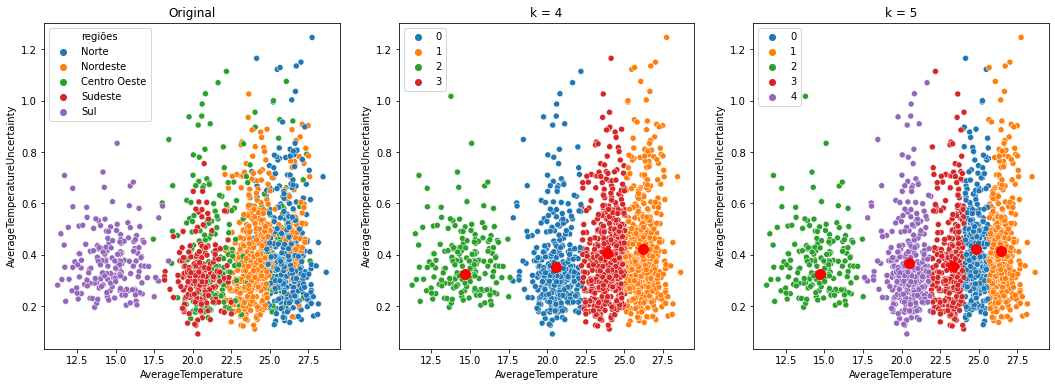

In [ ]:
centers4k = kmedoi4.cluster_centers_
centers5k = kmedoi5.cluster_centers_


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original")
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue = brasil_inverno['regiões'])


plt.subplot(1, 3, 2)
plt.title("k = 4")
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=kmedoi4_pred, palette= 'tab10')
#sns.scatterplot(centers4[:,0], centers4[:,1], hue ='red', s=100)
plt.scatter(centers4k[:,0], centers4k[:,1], c='red', s=100)


plt.subplot(1, 3, 3)
plt.title("k = 5")
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=kmedoi5_pred, palette= 'tab10')
#sns.scatterplot(centers5[:,0], centers5[:,1], c='red', s=100)
plt.scatter(centers5k[:,0], centers5k[:,1], c='red', s=100)

plt.show()

Abaixo, o gráfico do Kmedias.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

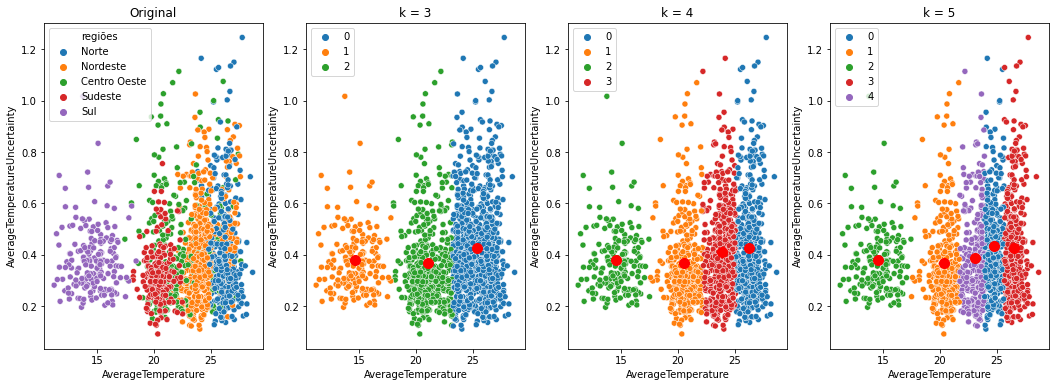

In [ ]:
centers3 = kmedia3.cluster_centers_
centers4 = kmedia4.cluster_centers_
centers5 = kmedia5.cluster_centers_


plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title("Original")
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue = brasil_inverno['regiões'])

plt.subplot(1, 4, 2)
plt.title("k = 3")
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue = kmedia3_pred, palette= 'tab10' )
# sns.scatterplot(centers3[:,0], centers3[:,1], hue ='red')
plt.scatter(centers3[:,0], centers3[:,1], c='red', s=100)


plt.subplot(1, 4, 3)
plt.title("k = 4")
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=kmedia4_pred, palette= 'tab10')
#sns.scatterplot(centers4[:,0], centers4[:,1], hue ='red', s=100)
plt.scatter(centers4[:,0], centers4[:,1], c='red', s=100)


plt.subplot(1, 4, 4)
plt.title("k = 5")
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=kmedia5_pred, palette= 'tab10')
#sns.scatterplot(centers5[:,0], centers5[:,1], c='red', s=100)
plt.scatter(centers5[:,0], centers5[:,1], c='red', s=100)

plt.show()

Visualmente, ficou melhor com o K=4, entretando o centrp Oeste varia muito as médias de temperaturas, o que não conseguiu destinguir com propriedade, conforme as métricas abaixo, com 3 seria a melhor divisão, entretando como tinhamos o rotulo, no Adjusted Rand Score, com 4 cluster.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

print("K-médias com k = 3")
print('Silhouette Score:', silhouette_score(X, kmedia3_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia3_pred, y)) #medida de erro/Com rotulo

print("K-médias com k = 4")
print('Silhouette Score:', silhouette_score(X, kmedia4_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia4_pred, y)) #medida de erro/Com rotulo

print("K-médias com k = 5")
print('Silhouette Score:', silhouette_score(X, kmedia5_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia5_pred, y)) #medida de erro/Com rotulo
# resultado -1 a 1

K-médias com k = 3
Silhouette Score: 0.6327201044735857
Adjusted Rand Score: 0.35367949070768817
K-médias com k = 4
Silhouette Score: 0.6150128379467327
Adjusted Rand Score: 0.4892115015341086
K-médias com k = 5
Silhouette Score: 0.5610224225907777
Adjusted Rand Score: 0.3718890337870763


# Abaixo um teste de Cluster Spectral

In [ ]:
from sklearn.cluster import SpectralClustering


clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
         random_state=0).fit(X)
# clustering.labels_
# array([1, 1, 1, 0, 0, 0])
# clusteringSpectralClustering(assign_labels='discretize', n_clusters=2,
#     random_state=0)

In [ ]:
clustering

SpectralClustering(assign_labels='discretize', n_clusters=2, random_state=0)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 1537 to 34326
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             1488 non-null   float64
 1   AverageTemperatureUncertainty  1488 non-null   float64
dtypes: float64(2)
memory usage: 34.9 KB


In [ ]:
X = np.array(X)

In [ ]:
clusteringNN = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans').fit(X[:, [0, 1]])
clusteringRBF = SpectralClustering(n_clusters=3, affinity='rbf', assign_labels='kmeans').fit(X)

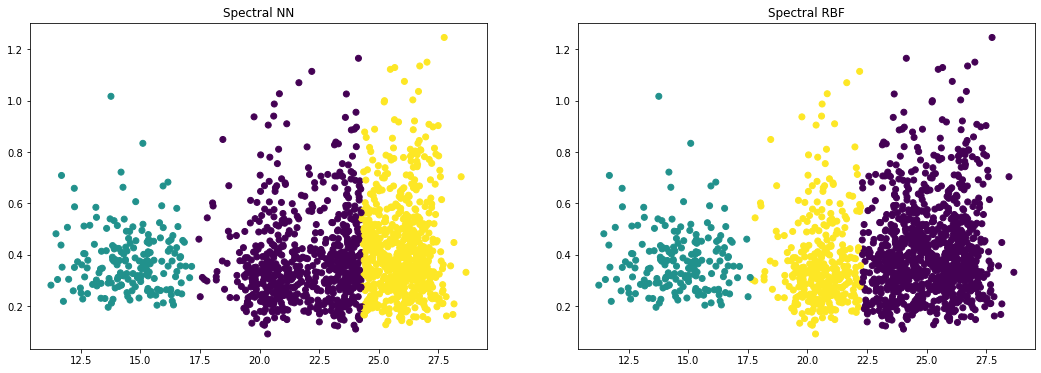

In [ ]:
plt.figure(figsize=(18, 6))

# plt.subplot(1, 3, 1)
# plt.title("Original")
# plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(1, 2, 1)
plt.title("Spectral NN")
plt.scatter(X[:, 0], X[:, 1], c=clusteringNN.labels_)

plt.subplot(1, 2, 2)
plt.title("Spectral RBF")
plt.scatter(X[:, 0], X[:, 1], c=clusteringRBF.labels_)


plt.show()

In [ ]:
print("K-médias com k = 5")
print('Silhouette Score:', silhouette_score(X, clusteringNN, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia5_pred, y)) #medida de erro/Com rotulo